# Essence of Linear Algera
This is the notes and exercises I did while learning essence of Linear Algera.<br>
Author: Luyan Ji<br><br>

<img src="img/math_religion.JPG" width="600">
<center>Credit to 3Blue1Brown</center>

Reference: 
* https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab
* https://www.w3resource.com/python-exercises/numpy/linear-algebra/index.php


In [18]:
# Load library
import numpy as np
import matplotlib.pyplot as plt
import math

### 1. Vector addition
$\begin{bmatrix} 1 \\ 2 \end{bmatrix}  + \begin{bmatrix} 3 \\ 4 \end{bmatrix} = \begin{bmatrix} 1+3 \\ 2+4 \end{bmatrix} = \begin{bmatrix} 4 \\ 6 \end{bmatrix}$

[[4]
 [6]]


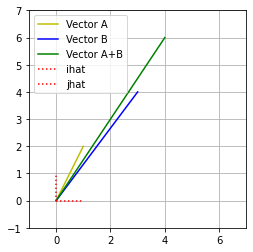

In [2]:
A = np.array([[1],[2]])
B = np.array([[3],[4]])
C = A+B
print (C)

plt.plot([0,A[0]],[0,A[1]],'y',label='Vector A', linewidth=1.5)
plt.plot([0,B[0]],[0,B[1]],'b',label='Vector B', linewidth=1.5)
plt.plot([0,C[0]],[0,C[1]],'g',label='Vector A+B', linewidth=1.5)
plt.plot([0,1],[0,0],'r:',label="ihat")
plt.plot([0,0],[0,1],'r:',label="jhat")

plt.legend()
plt.axis('square')
plt.axis((-1,7,-1,7))
plt.grid()
plt.show()


### 2. Scaling multiplication
$2\begin{bmatrix} 1 \\ -1 \end{bmatrix} = \begin{bmatrix} 2*1 \\ 2*(-1) \end{bmatrix} = \begin{bmatrix} 2 \\ -2 \end{bmatrix}$

[[ 2]
 [-2]]


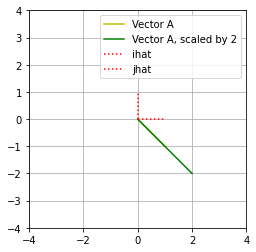

In [3]:
scale = 2
A = np.array([[1],[-1]])
C = scale * A
print(C)

plt.plot([0,A[0]],[0,A[1]],'y',label='Vector A', linewidth=1.5)
plt.plot([0,C[0]],[0,C[1]],'g',label='Vector A, scaled by 2', linewidth=1.5)
plt.plot([0,1],[0,0],'r:',label="ihat")
plt.plot([0,0],[0,1],'r:',label="jhat")

plt.legend()
plt.axis('square')
plt.axis((-4,4,-4,4))
plt.grid()
plt.show()


### 3. Linear transformations and matrices
The input vector moved to the output vector through **linear transformation**, where **grid lines remain parallel and evenly spaced, and the origin remains fixed**.<br><br>
For example, there is a vector $\vec{v} = -1\hat{i} + 2\hat{j}, \hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$.<br>
After linear transformation, the transformed vector $Transfomred\, \vec{v} = -1\,(Transformed \,\hat{i}) + 2\,(Transformed \,\hat{j})$. The linear combindation remains the same. If $Transformed \,\hat{i} = \begin{bmatrix} 1 \\ -2 \end{bmatrix}, Transformed \,\hat{j} = \begin{bmatrix} 3 \\ 0 \end{bmatrix}$, then $Transformed \, \vec{v} = -1\begin{bmatrix} 1 \\ -2 \end{bmatrix} + 2\begin{bmatrix} 3 \\ 0 \end{bmatrix} = \begin{bmatrix} -1*1 + 2*3 \\ -1*(-2) + 2*0 \end{bmatrix} = \begin{bmatrix} 5 \\ 2 \end{bmatrix}$.<br><br>
The 2 by 2 matrix $\begin{bmatrix} 1 & 3 \\ -2 & 0 \end{bmatrix}$ tells how did the linear transformation go? $\begin{bmatrix} 1 \\ -2 \end{bmatrix}$ tells where the transformed $\hat{i}$ lands, and $\begin{bmatrix} 3 \\ 0 \end{bmatrix}$ tells where the transformed $\hat{j}$ lands. Thus,
$\begin{bmatrix} 1 & 3 \\ -2 & 0 \end{bmatrix}\begin{bmatrix} -1 \\ 2 \end{bmatrix} = -1\begin{bmatrix} 1 \\ -2 \end{bmatrix} + 2\begin{bmatrix} 3 \\ 0 \end{bmatrix} = \begin{bmatrix} 5 \\ 2 \end{bmatrix}$ 
<br>
<br>
In general,
$$\begin{bmatrix} a & b \\ c & d \end{bmatrix}\begin{bmatrix} x \\ y \end{bmatrix} = x\begin{bmatrix} a \\ c \end{bmatrix} + y\begin{bmatrix} b \\ d \end{bmatrix} = \begin{bmatrix} ax+by \\ cx+dy \end{bmatrix}$$
<br><br>
To be noted, we have to use "@" (__matmul__) to do matrix multiplication, or to use np.dot.<br>
The * sign is to do cross product, which will be discussed below (point 10).

In [4]:
M = np.array([[1,3],[-2,0]])
v = np.array([[-1],[2]])
#print(M, M.shape, type(M))
#print(v, v.shape, type(v))
print(M*v)
print(M @ v) 
print(np.dot(M,v))

[[-1 -3]
 [-4  0]]
[[5]
 [2]]
[[5]
 [2]]


### 4. Matrix multiplication as composition
$\begin{bmatrix} a & b \\ c & d \end{bmatrix}\begin{bmatrix} e & f \\ g & h \end{bmatrix} = \begin{bmatrix} ae + bg & af + bh \\ ce + dg & cf + dh \end{bmatrix} $<br><br>
$\begin{bmatrix} a & b \\ c & d \end{bmatrix}\begin{bmatrix} e \\ g\end{bmatrix} = e\begin{bmatrix} a \\ c \end{bmatrix} + g\begin{bmatrix} b \\ d \end{bmatrix} = \begin{bmatrix} ae + bg \\ ce + dg \end{bmatrix} $<br><br>
$\begin{bmatrix} a & b \\ c & d \end{bmatrix}\begin{bmatrix} f \\ h\end{bmatrix} = f\begin{bmatrix} a \\ c \end{bmatrix} + h\begin{bmatrix} b \\ d \end{bmatrix} = \begin{bmatrix} af + bh \\ cf + dh \end{bmatrix}$
##### Rotate and then shear
$\begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}\begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} = \begin{bmatrix} 1 & -1 \\ 1 & 0 \end{bmatrix} $

##### Shear and then rotate
$\begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} = \begin{bmatrix} 0 & -1 \\ 1 & 1 \end{bmatrix} $
<br>
<br>
$$\begin{equation}M_1M_2 \neq M_2M_1 \end{equation}$$
<br><br>
##### Associativity
$$\begin{equation}(AB)C = A(BC) \end{equation}$$
<br><br>
$\begin{bmatrix} a & b \\ c & d \end{bmatrix} \left( \begin{bmatrix} e & f \\ g & h \end{bmatrix}\begin{bmatrix} i & j \\ k & l \end{bmatrix} \right) = \left( \begin{bmatrix} a & b \\ c & d\end{bmatrix}\begin{bmatrix} e & f \\ g & h \end{bmatrix} \right)\begin{bmatrix} i & j \\ k & l \end{bmatrix}$
<br><br>
$\begin{bmatrix} a & b \\ c & d \end{bmatrix} \left( \begin{bmatrix} e & f \\ g & h \end{bmatrix}\begin{bmatrix} i & j \\ k & l \end{bmatrix} 
\right) = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} ei + kf & ej+lf \\ gi + hk & gj + hl \end{bmatrix} = \begin{bmatrix} a(ei+kf) + b(gi+hk) & a(ej+lf) + b(gj+hl) \\ c(ei+kf) + d(gi+hk) & c(ej+lf) + d(gj+hl) \end{bmatrix}$<br><br>
$\left( \begin{bmatrix} a & b \\ c & d \end{bmatrix}\begin{bmatrix} e & f \\ g & h \end{bmatrix} \right)\begin{bmatrix} i & j \\ k & l \end{bmatrix} = \begin{bmatrix} ae + bg & af + bh  \\ ce + dg & cf + dh \end{bmatrix} \begin{bmatrix} i & j \\ k & l\end{bmatrix} = \begin{bmatrix} i(ae+bg) + k(af+bh) & j(ae+bg) + l(af+bh) \\ i(ce+dg) + k(cf+dh) & j(ce+dg) + l(cf+dh) \end{bmatrix}$


[[1 1]
 [0 1]] [[ 0 -1]
 [ 1  0]]
[[ 1 -1]
 [ 1  0]] [[ 0 -1]
 [ 1  1]]
[0 1] [-1  2]


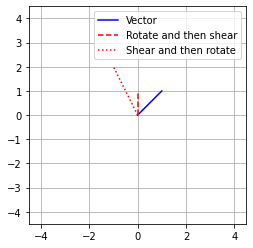

In [5]:
v = np.array([1,1])
M1 = np.array([[1,1],[0,1]])
M2 = np.array([[0,-1],[1,0]])
C1 = M1 @ M2
C2 = M2 @ M1
print(M1,M2)
print(C1,C2)

C1v = C1 @ v
C2v = C2 @ v
print(C1v, C2v)

plt.plot([0,v[0]],[0,v[1]],'b-',label='Vector', linewidth=1.5)
plt.plot([0,C1v[0]],[0,C1v[1]],'r--',label='Rotate and then shear', linewidth=1.5)
plt.plot([0,C2v[0]],[0,C2v[1]],'r:',label='Shear and then rotate', linewidth=1.5)

plt.legend()
plt.axis('square')
plt.axis((-4.5,4.5,-4.5,4.5))
plt.grid()
plt.show()

In [6]:
A = np.array([[1,2],[3,4]])
B = np.array([[1,1],[0,1]])
C = np.array([[-1,1],[0,2]])

AB_C = (A@B)@C
A_BC = A@(B@C)

print(AB_C)
print(A_BC)
print (AB_C == A_BC)


[[-1  7]
 [-3 17]]
[[-1  7]
 [-3 17]]
[[ True  True]
 [ True  True]]


### 5. 3D linear transformation
$ \begin{bmatrix} 0 & 1 & 2 \\ 3 & 4 & 5 \\ 6 & 7 & 8\end{bmatrix}\begin{bmatrix} x \\ y \\ z \end{bmatrix} = x\begin{bmatrix} 0 \\ 3 \\6 \end{bmatrix}\ + y\begin{bmatrix} 1 \\ 4 \\ 7 \end{bmatrix} + z\begin{bmatrix} 2 \\ 5\\ 8 \end{bmatrix}$
<br><br>
$ \begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33}\end{bmatrix}\begin{bmatrix} b_{11} & b_{12} & b_{13} \\ b_{21} & b_{22} & b_{23} \\ b_{31} & b_{32} & b_{33}\end{bmatrix} = \begin{bmatrix} a_{11}b_{11} + a_{12}b_{21} + a_{13}b_{31} & a_{11}b_{12} + a_{12}b_{22} + a_{13}b_{32} & a_{11}b_{13} + a_{12}b_{23} + a_{13}b_{33} \\ a_{21}b_{11} + a_{22}b_{21} + a_{23}b_{31} & a_{21}b_{12} + a_{22}b_{22} + a_{23}b_{32} & a_{21}b_{13} + a_{22}b_{23} + a_{23}b_{33} \\ a_{31}b_{11} + a_{32}b_{21} + a_{33}b_{31} & a_{31}b_{12} + a_{32}b_{22} + a_{32}b_{32} & a_{31}b_{13} + a_{32}b_{23} + a_{32}b_{33} \end{bmatrix} $
<br><br>
$\begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33}\end{bmatrix} \begin{bmatrix} b_{11} \\ b_{21} \\ b_{31}\end{bmatrix} = \begin{bmatrix} a_{11}b_{11} + a_{12}b_{21} + a_{13}b_{31} \\ a_{21}b_{11} + a_{22}b_{21} + a_{23}b_{31} \\ a_{31}b_{11} + a_{32}b_{21} + a_{33}b_{31}\end{bmatrix}$
<br><br>
$\begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33}\end{bmatrix} \begin{bmatrix} b_{12} \\ b_{22} \\ b_{32}\end{bmatrix} = \begin{bmatrix} a_{11}b_{12} + a_{12}b_{22} + a_{13}b_{32} \\ a_{21}b_{12} + a_{22}b_{22} + a_{23}b_{32} \\ a_{31}b_{12} + a_{32}b_{22} + a_{32}b_{32}\end{bmatrix}$
<br><br>
$\begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33}\end{bmatrix} \begin{bmatrix} b_{13} \\ b_{23} \\ b_{33}\end{bmatrix} = \begin{bmatrix} a_{11}b_{13} + a_{12}b_{23} + a_{13}b_{33} \\ a_{21}b_{13} + a_{22}b_{23} + a_{23}b_{33} \\ a_{31}b_{13} + a_{32}b_{23} + a_{32}b_{33}\end{bmatrix}$
<br><br>


In [7]:
M1 = np.array([[0,-2,2],[5,1,5],[1,4,-1]])
M2 = np.array([[0,1,2],[3,4,5],[6,7,8]])
M1M2 = M1 @ M2
print(M1M2)

[[ 6  6  6]
 [33 44 55]
 [ 6 10 14]]


### 6. The determinant
The determinant of a transformation can be considered as the scaling factor by which a linear transformation changes any area.
<br><br>
$ det\left( \begin{bmatrix} a & b \\ c & d\end{bmatrix} \right) = ad - bc $
<br><br>
$ det\left( \begin{bmatrix} a & b & c \\ d & e & f\\ g & h & i\end{bmatrix} \right) = {\color{red}a}\, det\left( \begin{bmatrix} c & f \\ h & i\end{bmatrix} \right) - {\color{red}b}\, det\left( \begin{bmatrix} d & f \\ g & i\end{bmatrix} \right) + {\color{red}c}\, det\left( \begin{bmatrix} d & e \\ g & h\end{bmatrix} \right) = a*(ci - fh) -b*(di - fg) + c*(dh - eg) $

In [8]:
A = np.array([[3,2],[0,2]])
print(A,np.linalg.det(A))

A = np.array([[1,2],[2,4]])
print(A,np.linalg.det(A))

A = np.array([[1,2],[1,-1]])
print(A,np.linalg.det(A))

B = np.array([[1,2,0],[3,5,8],[2,-3,0]])
print(B, np.linalg.det(B))
print(1*(0*0 - 8*(-3)) - 2*(3*0 - 2*8) + 0*(3*5 - 2*(-3)))

[[3 2]
 [0 2]] 6.0
[[1 2]
 [2 4]] 0.0
[[ 1  2]
 [ 1 -1]] -3.0000000000000004
[[ 1  2  0]
 [ 3  5  8]
 [ 2 -3  0]] 55.99999999999997
56


### 7. Inverse matrix
Here is an example of a linear system of equations:<br>
 
$\begin{align}
2{\color{green}x}+5{\color{red}y}+3{\color{blue}z} & = -3 \\
4{\color{green}x}+0{\color{red}y}+8{\color{blue}z} & = 0 \\
1{\color{green}x}+3{\color{red}y}+0{\color{blue}z} & = 2 
\end{align}$ 
<br><br>

It can also be written in a form of matrix.<br><br>
$ \begin{bmatrix} 2 & 5 & 3 \\ 4 & 0 & 8 \\ 1 & 3 & 0\end{bmatrix} \begin{bmatrix} {\color{green}x} \\ {\color{red}y} \\ {\color{blue}z}\end{bmatrix} = \begin{bmatrix} -3 \\ 0\\ 2 \end{bmatrix}$<br><br>
$$ A\vec{x}=\vec{v} $$<br><br>
To solve the equation, we could multiply the inverse Matrix of A to both sides of the equation.<br><br>
$$ A^{-1}A\vec{x} = A^{-1}\vec{v}$$<br>
$$ \vec{x} = A^{-1}\vec{v} $$ <br>
The part $A^{-1}A$ does nothing, and $A^{-1}A=\begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}$, which means that after linear transformation of A and the inverse of A, the basis vetors remain unchanged. For example, the inverse of 90$^{\circ}$ Counterclockwise is 90$^{\circ}$ Clockwise. <br><br> 




In [9]:
A = np.array([[0,-1],[1,0]]) 
B = np.linalg.inv(A) 
print (A) 
print (B) 
print (np.dot(A,B))

A = np.array([[2,5,3],[4,0,8],[1,3,0]])
v = np.array([[-3],[0],[2]])
x = np.dot(np.linalg.inv(A),v)
print(x)
print(2*x[0]+5*x[1]+3*x[2])
print(4*x[0]+0*x[1]+8*x[2])
print(1*x[0]+3*x[1]+0*x[2])

[[ 0 -1]
 [ 1  0]]
[[ 0.  1.]
 [-1. -0.]]
[[1. 0.]
 [0. 1.]]
[[ 5.42857143]
 [-1.14285714]
 [-2.71428571]]
[-3.]
[0.]
[2.]


### 8. Nonsquare matrix
It could be considered as linear transformations from a 2D space to a 3D sapce (e.g., 3 by 2 matrix), or from a 3D space to a 2D space (e.g., 2 by 3 matrix). The linear transformations can also occur from a 2D space to a 1D space (e.g., 1 by 2 matrix).


In [10]:
A = np.array([[2,0],[-1,1],[-2,1]])
print(A, A.shape,np.linalg.matrix_rank(A))

# giving errors, the determinant can also be computed for a square matrix
# print(np.linalg.det(A)) 

A = np.array([[3,1,4],[1,5,9]])
print(A, A.shape,np.linalg.matrix_rank(A))

A = np.array([[1,2]])
print(A, A.shape,np.linalg.matrix_rank(A))

[[ 2  0]
 [-1  1]
 [-2  1]] (3, 2) 2
[[3 1 4]
 [1 5 9]] (2, 3) 2
[[1 2]] (1, 2) 1


### 9. Dot products and duality
**Matrix-vector product <==> Dot product**<br><br>
Anytime you have one of these linear transformations whose output space is the number line, no matter how it was defined, there's going to be some unique vector v corresponding to that transformation. In the sense that applying the transformation is the same thing as taking a dot product.<br><br>
$$\begin{bmatrix} u_x \\ u_y \end{bmatrix} \cdot \begin{bmatrix} x \\ y\end{bmatrix} = u_x\cdot x+u_y\cdot y$$<br>
$$\begin{bmatrix} u_x & u_y \end{bmatrix} \begin{bmatrix} x \\ y\end{bmatrix} = u_x\cdot x+u_y\cdot y$$
<br><br>
Traditionally dot product is defined as follows:<br><br>
If $\vec{v}$ and $\vec{w}$ have similar directions, $\vec{v} \cdot \vec{w} = $ (Length of projected $\vec{w}$ on $\vec{v})$(Length of $\vec{v}$), the dot product is positive. <br><br>
If $\vec{v}$ and $\vec{w}$ have opposing directions, $\vec{v} \cdot \vec{w} = $ -(Length of projected $\vec{w}$ on $\vec{v})$(Length of $\vec{v}$), the dot product is negative.<br><br>
If $\vec{v}$ and $\vec{w}$ are perpendicular, meaning that the length of projected $\vec{w}$ is zero, the dot product is $0$.<br><br>
The order of the two vectors does not matter.<br> $\vec{v} \cdot \vec{w} = $ $\vec{w} \cdot \vec{v} = $ (Length of projected $\vec{w}$ on $\vec{v})$(Length of $\vec{v}$) $=$ (Length of projected $\vec{v}$ on $\vec{w})$(Length of $\vec{w}$)
<br><br>
##### Associativity
$(2\vec{v}) \cdot \vec{w} = 2(\vec{v} \cdot \vec{w})$

In [31]:
A1 = np.array([2,3])
A2 = np.array([[2,3]])

print (A1, A1.shape)
print (A2, A2.shape)

B = np.array([[4],[5]])
print(B, B.shape)
print(np.dot(A1,B))
print(A2@B) # print(np.dot(A2,B))  

print((2*A2)@B, 2*(A2@B))

C = np.array([-2,-3])
print(C@B)

[2 3] (2,)
[[2 3]] (1, 2)
[[4]
 [5]] (2, 1)
[23]
[[23]]
[[46]] [[46]]
[-23]


### 10. Cross products
In a 2D space, $\vec{v} \times \vec{w} = \pm$ Area of parallelogram spanned by $\vec{v}$ and $\vec{w}$.<br><br>
If $\vec{v}$ is at the right side of $\vec{w}$, similarly as the basis vector $\hat{i}$ is at the right side of $\hat{j}$, the cross product is positive.<br><br>
If $\vec{v}$ is at the left side of $\vec{w}$, the cross product is negative.<br><br>
Thus, the order of $\vec{v}$ and $\vec{w}$ matters.
$$\vec{v} \times \vec{w} = - \vec{w} \times \vec{v}$$
<br>

In a 3D space, $\vec{v} \times \vec{w} = \vec{p}$. The cross product is not a number as in the 2D space, but a vector.<br><br>
The length of $\vec{p}$ is the area of the parallelogram spanned by $\vec{v}$ and $\vec{w}$, and the direction of $\vec{p}$ is perpendicular to the parallelogram, and follows the right hand rule.<br><br>
$$\begin{bmatrix} v_1 \\ v_2 \\ v_3 \end{bmatrix} \times \begin{bmatrix} w_1 \\ w_2 \\ w_3 \end{bmatrix} = \begin{bmatrix} v_2 \cdot w_3 - w_2 \cdot v_3 \\ v_3 \cdot w_1 - w_3 \cdot v_1 \\ v_1 \cdot w_2 - w_1 \cdot v_2 \end{bmatrix}$$
<br><br>
$\begin{bmatrix} v_1 \\ v_2 \\ v_3 \end{bmatrix} \times \begin{bmatrix} w_1 \\ w_2 \\ w_3 \end{bmatrix} = det \left( \begin{bmatrix} \hat{i} & v_1 & w_1 \\ \hat{j} & v_2 & v_3 \\ \hat{k} & v_3 & w_3 \end{bmatrix} \right) = $<br> 
$\hat{i}(v_2 w_3 - w_2 v_3) + \hat{j}(v_3 w_1 - w_3 v_1) + \hat{k}(v_1 w_2 - w_1 v_2) $

##### Associativity
$$(3\vec{v}) \times \vec{w} = 3(\vec{v} \times \vec{w})$$
<br><br>

**From another perspective**, we assume transforming a 3D vector $[x, y, z]$ to a 1D number line which results in the determinant of a matrix whose first column is the vector, and the other two columns are the coordinates of $\vec{v}$ and $\vec{w}$. Then we need to find out the transformation matrix (i.e., the dual vector) which can be demonstrated to be the cross product of $\vec{v}$ and $\vec{w}$.<br><br>

$\begin{bmatrix} ? & ? & ?\end{bmatrix}\begin{bmatrix} x \\ y \\z\end{bmatrix} = det \left( \begin{bmatrix} x & v_1 & w_1 \\ y & v_2 & w_2 \\ z & v_3 & w_3\end{bmatrix}\right)$<br><br>

$\begin{bmatrix} ? \\ ? \\ ?\end{bmatrix} \cdot \begin{bmatrix} x \\ y \\z\end{bmatrix} = det \left( \begin{bmatrix} x & v_1 & w_1 \\ y & v_2 & w_2 \\ z & v_3 & w_3\end{bmatrix}\right)$<br><br>

$\begin{bmatrix} p_1 \\ p_2 \\ p_3\end{bmatrix} \cdot \begin{bmatrix} x \\ y \\z\end{bmatrix} = det \left( \begin{bmatrix} x & v_1 & w_1 \\ y & v_2 & w_2 \\ z & v_3 & w_3\end{bmatrix}\right)$<br><br>

**Computationally**, $p_1 \cdot x + p_2 \cdot y + p_3 \cdot z = x(v_2 w_3 - w_2 v_3) + y(v_3 w_1 - w_3 v_1) + z(v_1 w_2 - w_1 v_2) $, thus $$p_1 = v_2 w_3 - w_2 v_3$$ $$p_2 = v_3 w_1 - w_3 v_1$$  $$p_3 = v_1 w_2 - w_1 v_2 $$
<br><br>
**Geometrically**,<br>
$\vec{P} \cdot \begin{bmatrix} x \\ y \\z\end{bmatrix} =$ (Length of projection of vector $\begin{bmatrix} x \\ y \\z\end{bmatrix}$ on $\vec{P}$) $\times$ (Length of $\vec{P}$)<br><br>
The volumn of the parallelepiped (i.e., the determinant of the matrix whose first column is the vector $[x, y, z]$, and the other columns are $\vec{v}$ and $\vec{w}$) is:<br> 
(Area of parallelogram spanned by $\vec{v}$ and $\vec{w}$) $\times$ (The projection of $\begin{bmatrix} x \\ y \\z\end{bmatrix}$ on the line perpendicular to both $\vec{v}$ and $\vec{w}$)<br><br>
The length of $\vec{P}$ = Area of parallelogram <br><br>
The direction of $\vec{P}$ is perpendicular to both $\vec{v}$ and $\vec{w}$.

In [49]:
A = np.random.randint(10, size=(3, ))
B = np.random.randint(10, size=(3, ))
C = np.cross(A,B)

print(A,B)
print(C)
print(A[1]*B[2]-B[1]*A[2], A[2]*B[0]-B[2]*A[0], A[0]*B[1]-B[0]*A[1])  

[8 3 4] [2 6 6]
[ -6 -40  42]
-6 -40 42


### 11. Eigenvectors and eigenvalues
After the linear transformation, the vector remains on its own span.<br><br>
$$A\vec{v} = \lambda \vec{v}$$
<br>
A is the transformation matrix, $\vec{v}$ is the **eigenvector**, and $\lambda$ is the **eigenvalue**.<br><br>
$\lambda$ can be written into the matrix form:<br>
$$\begin{bmatrix} \lambda & 0 & 0 \\ 0 & \lambda & 0 \\ 0 & 0 & \lambda\end{bmatrix} = \lambda \begin{bmatrix}1&0&0\\0&1&0\\0&0&1\end{bmatrix}$$<br>
$$A\vec{v} = (\lambda I) \vec{v}$$<br>
$$(A- \lambda I) \vec{v} =\vec{0}$$<br>
To find a nonzero solution for $\vec{v}$, we need $det(A-\lambda I)=0$<br>
For example, for the matrix $\begin{bmatrix}3&1\\0&2\end{bmatrix}$, the eigenvalues are the solutions to:<br>
$det(\begin{bmatrix}3 & 1 \\ 0 & 2\end{bmatrix} - \begin{bmatrix}\lambda & 0 \\ 0 & \lambda\end{bmatrix}) = det\left( \begin{bmatrix}3-\lambda & 1 \\ 0 & 2-\lambda\end{bmatrix}\right) = (3-\lambda)(2-\lambda)=0$<br><br>
$\lambda = 2$ or $\lambda = 3$
<br><br>
To find the eigenvector, we plug the eigenvalue into the matrix, and to find the solutions to:<br>
$\begin{bmatrix}3-2 & 1 \\ 0 & 2-2\end{bmatrix}\begin{bmatrix}x\\y\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$<br><br>
The solutions are all vectors on the diagonal line spanned by [1,-1]


In [43]:
A=np.array([[0,1],[1,1]])
A_square = A@A
A_cub = A_square@A
A_quar = A_cub@A
A_fifth = A_quar@A

print(A)
print(A_square)
print(A_cub)
print(A_quar)
print(A_fifth)
print(A_fifth@A)

# the two columns of B are the eigenvectors of A, use these two eigenvectors as eigenbasis
B = np.array([[2,2],[1+math.sqrt(5),1-math.sqrt(5)]])
B_inverse = np.linalg.inv(B)
C = B_inverse@A@B  # how was matrix A expressed in the new coordinate system with the new eigenbasis 
C2 = C@C
C3 = C@C2

print(B)
print(B_inverse)
print(C)
print(C2)
print(C3)
print(C@C2 == C2@C)
print(1.618,1.618**2,1.618**3)
print(-0.618,-0.618**2,-0.618**3)


[[0 1]
 [1 1]]
[[1 1]
 [1 2]]
[[1 2]
 [2 3]]
[[2 3]
 [3 5]]
[[3 5]
 [5 8]]
[[ 5  8]
 [ 8 13]]
[[ 2.          2.        ]
 [ 3.23606798 -1.23606798]]
[[ 0.1381966  0.2236068]
 [ 0.3618034 -0.2236068]]
[[ 1.61803399e+00 -5.55111512e-17]
 [ 1.66533454e-16 -6.18033989e-01]]
[[ 2.61803399e+00 -5.55111512e-17]
 [ 1.66533454e-16  3.81966011e-01]]
[[ 4.23606798e+00 -1.11022302e-16]
 [ 3.33066907e-16 -2.36067977e-01]]
[[ True  True]
 [ True  True]]
1.618 2.6179240000000004 4.235801032000001
-0.618 -0.381924 -0.236029032
